# NOTEBOOK - 6

# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Importing the Dataset

In [2]:
import pandas as pd
df = pd.read_csv("medical_conditions_dataset.csv")
df

,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,1,User0001,NaN,male,Non-Smoker,NaN,NaN,NaN,Pneumonia
1,2,User0002,30.0,male,Non-Smoker,NaN,105.315064,NaN,Diabetic
2,3,User0003,18.0,male,Non-Smoker,35.612486,NaN,NaN,Pneumonia
3,4,User0004,NaN,male,Non-Smoker,NaN,99.119829,NaN,Pneumonia
4,5,User0005,76.0,male,Non-Smoker,NaN,NaN,NaN,Diabetic
...,...,...,...,...,...,...,...,...,...
9995,9996,User9996,NaN,male,Non-Smoker,25.029002,152.540355,137.551451,Pneumonia
9996,9997,User9997,NaN,male,Non-Smoker,27.017487,NaN,NaN,Diabetic
9997,9998,User9998,23.0,male,Smoker,NaN,148.833321,173.931480,Pneumonia
9998,9999,User9999,NaN,female,Non-Smoker,NaN,NaN,NaN,Pneumonia


# 1. Feature Selection & Preprocessing 

1. Problem-Specific Feature Selection
The features chosen should directly relate to smoking behavior. For example:
    
* Age: Smoking habits often vary by age, making it an important feature.
* Gender: Smoking rates differ between genders, so gender is crucial.
* Income: Smoking rates are sometimes higher among lower-income groups.
* Education: Higher education levels tend to correlate with lower smoking rates.
* Occupation: Certain occupations may have higher smoking rates due to stress or social factors.
These features are selected based on their clear connection to smoking behavior.

2. Domain Knowledge
Understanding the problem helps identify key features, even if not immediately apparent statistically. For instance:

* Health variables: Chronic diseases or mental health issues might affect smoking behaviors.
* Social influences: Family or friends who smoke can influence one's smoking habits.

These insights help ensure the model reflects real-world factors affecting smoking.

# Data Cleaning and EDA

In [3]:
# Summary Statistics 
df.describe()

,id,age,bmi,blood_pressure,glucose_levels
count,10000.00000,5445.000000,4652.000000,3766.000000,4756.000000
mean,5000.50000,53.541598,27.423420,135.209429,135.219608
std,2886.89568,20.925113,7.231257,26.041531,37.607638
min,1.00000,18.000000,15.012119,90.009620,70.015961
25%,2500.75000,35.000000,21.077894,113.107754,102.273703
50%,5000.50000,54.000000,27.326204,134.821040,135.436764
75%,7500.25000,72.000000,33.689330,157.949509,168.349011
max,10000.00000,89.000000,39.998687,179.999359,199.890429


In [4]:
# Checking %age of missing values in the dataset 
df.isnull().mean()*100

id                 0.00
full_name          0.00
age               45.55
gender             0.00
smoking_status     0.00
bmi               53.48
blood_pressure    62.34
glucose_levels    52.44
condition          0.00
dtype: float64

Missing Data Summary:
                Missing Count  Missing Percentage
blood_pressure           6234               62.34
bmi                      5348               53.48
glucose_levels           5244               52.44
age                      4555               45.55


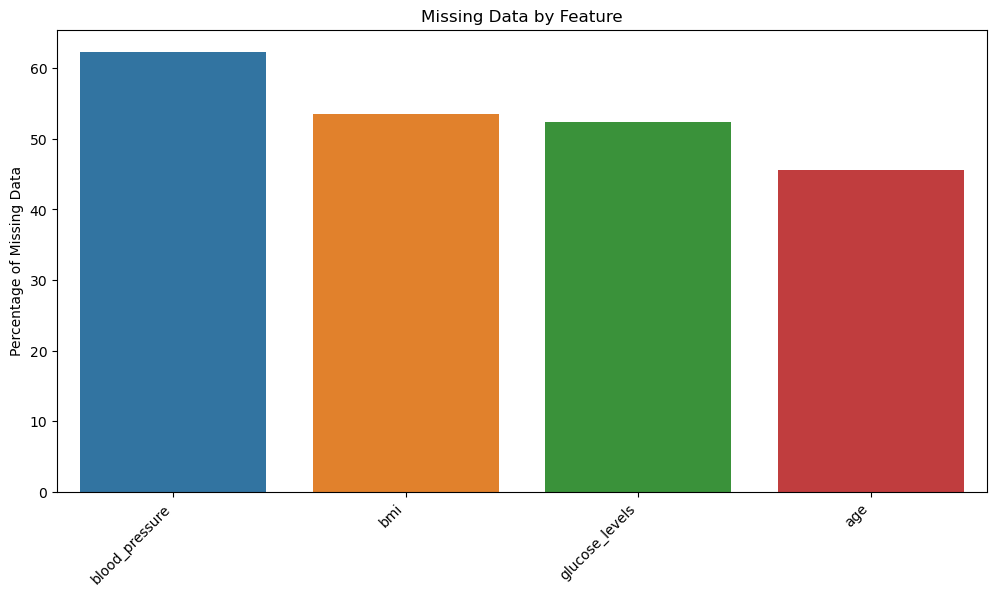

In [5]:
# missing data analysis 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Checking missing values per column
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)
print("Missing Data Summary:")
print(missing_df)

# 2. Visualize percentage of missing data as a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_df.index, y='Missing Percentage', data=missing_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage of Missing Data')
plt.title('Missing Data by Feature')
plt.show()


In [6]:
# Data Cleaning

# Dropping unnecessary columns
df.drop(columns=['id', 'full_name'], inplace=True)
# Convert 'age' into integer, marking small values or nulls as NA
df['age'] = df['age'].apply(lambda x: int(x) if pd.notna(x) and x > 1 else pd.NA)
# Drop rows where age is missing
df = df.dropna(subset=['age'])
# Reset index (optional but recommended)
df.reset_index(drop=True, inplace=True)

# Imputation Technique 6 - MICE (Multivariate Imputation by Chained Equations)

In [7]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

# Columns to impute
columns_to_impute = ['age', 'bmi', 'blood_pressure', 'glucose_levels']

# Apply MICE Imputation
mice_imputer = IterativeImputer(random_state=42)
df[columns_to_impute] = mice_imputer.fit_transform(df[columns_to_impute])

# View results
print(df[columns_to_impute].head())


    age        bmi  blood_pressure  glucose_levels
0  30.0  27.076243      105.315064      135.040836
1  18.0  35.612486      135.197811      135.045366
2  76.0  27.955816      135.240417      135.050097
3  40.0  33.840723      135.214792      135.047035
4  49.0  27.557113      135.226182      153.151126


/var/folders/3z/04dfh84n663cm0t0v83rlcv00000gn/T/ipykernel_5017/404113995.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_impute] = mice_imputer.fit_transform(df[columns_to_impute])


In [8]:
df.isnull().mean()*100

age               0.0
gender            0.0
smoking_status    0.0
bmi               0.0
blood_pressure    0.0
glucose_levels    0.0
condition         0.0
dtype: float64

# Handling Outliers 

In [9]:
# Manually specify numerical columns to check for outliers
numerical_cols = ['age', 'bmi', 'blood_pressure', "glucose_levels"]

# Compute Q1, Q3, and IQR
Q1 = df[['age', 'bmi', 'blood_pressure']].quantile(0.25)
Q3 = df[['age', 'bmi', 'blood_pressure']].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows: keep only those that are not outliers in any specified column
df_no_outliers_iqr = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]

# Display how many rows were removed
print(f"Rows before: {df.shape[0]}")
print(f"Rows after outlier removal: {df_no_outliers_iqr.shape[0]}")


Rows before: 5445
Rows after outlier removal: 2106


/var/folders/3z/04dfh84n663cm0t0v83rlcv00000gn/T/ipykernel_5017/3347998392.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_no_outliers_iqr = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]
/var/folders/3z/04dfh84n663cm0t0v83rlcv00000gn/T/ipykernel_5017/3347998392.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_no_outliers_iqr = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]


In this data preprocessing step, outlier removal was performed using the Interquartile Range (IQR) method on selected numerical columns: `age`, `bmi`, and `blood_pressure`. The first (Q1) and third (Q3) quartiles were calculated for each of these columns to determine the IQR, which was then used to define lower and upper bounds for acceptable values. Any rows containing values outside these bounds in any of the specified columns were considered outliers and removed from the dataset. As a result, the dataset size was reduced from 5,445 to 2,106 rows, significantly cleaning the data for further analysis.


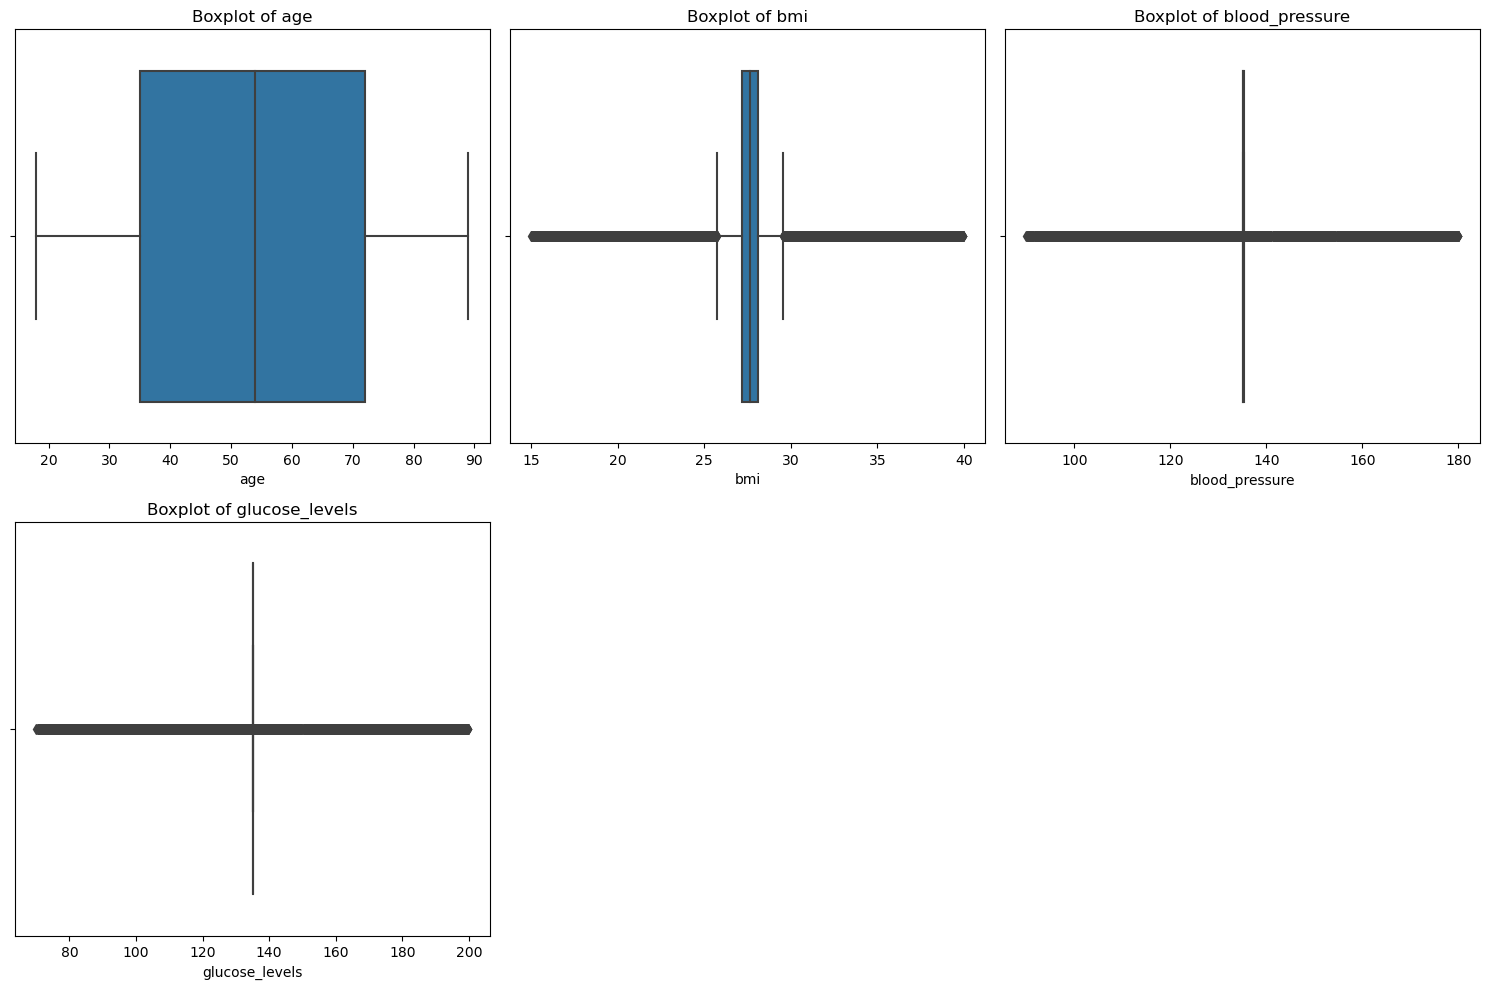

In [10]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot((len(numerical_cols)-1)//3 + 1, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


# Encoding 

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd

# Step 1: Separate features and target
y = df['smoking_status'] 
encod3 = LabelEncoder()
y = encod3.fit_transform(y) 

# Step 2: Define columns for encoding
onehot_cols = ["gender"]
ordinal_cols = ["condition"]
feature_cols = [col for col in df.columns if col not in (["smoking_status"])]  # all features except target

# Step 3: Define ColumnTransformer
ct = ColumnTransformer(transformers=[
    ('gender_onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_cols),
    ('condition_ordinal', OrdinalEncoder(categories=[["Diabetic", "Pneumonia", "Cancer"]]), ordinal_cols)
], remainder="passthrough")

# Step 4: Fit and transform only features
X = ct.fit_transform(df[feature_cols])  # Only features, not target

# Step 5: Create column names for the new DataFrame
new_columns = []
new_columns += list(ct.named_transformers_['gender_onehot'].get_feature_names_out(onehot_cols))  # OneHot names
new_columns += ordinal_cols  # Ordinal names
# Passthrough columns: all columns not encoded
passthrough_cols = [col for col in feature_cols if col not in onehot_cols + ordinal_cols]
new_columns += passthrough_cols

# Step 6: Reconstruct final X DataFrame
X = pd.DataFrame(X, columns=new_columns)
X.head()

,gender_female,gender_male,condition,age,bmi,blood_pressure,glucose_levels
0,0.0,1.0,0.0,30.0,27.076243,105.315064,135.040836
1,0.0,1.0,1.0,18.0,35.612486,135.197811,135.045366
2,0.0,1.0,0.0,76.0,27.955816,135.240417,135.050097
3,0.0,1.0,0.0,40.0,33.840723,135.214792,135.047035
4,0.0,1.0,2.0,49.0,27.557113,135.226182,153.151126


# Scaling 

In [12]:
from sklearn.preprocessing import StandardScaler
# Specify the columns to scale
columns_to_scale = ['age', 'bmi', 'blood_pressure', 'glucose_levels']
scaler = StandardScaler()
# Fit and transform 
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head()  

/var/folders/3z/04dfh84n663cm0t0v83rlcv00000gn/T/ipykernel_5017/2021023578.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,-1.125144,male,Non-Smoker,-0.117344,-1.872192,-0.000303,Diabetic
1,-1.698670,male,Non-Smoker,1.638702,-0.001486,-0.000127,Pneumonia
2,1.073374,male,Non-Smoker,0.063598,0.001181,0.000057,Diabetic
3,-0.647205,male,Non-Smoker,1.274221,-0.000423,-0.000062,Diabetic
4,-0.217060,male,Smoker,-0.018421,0.000290,0.703129,Cancer


# 2. Model Training and Evaluation 

I chose to evaluate **Logistic Regression, Random Forest, and Support Vector Machine (SVM)** models for this dataset to identify the most effective approach for predicting smoking status (smoker or non-smoker). **Logistic Regression** was selected for its simplicity, interpretability, and suitability for binary classification. It provides clear insights into how each feature—such as age, gender, and income—influences the likelihood of smoking, which is valuable for explaining the results. **Random Forest** was included due to its ability to capture complex, non-linear patterns and handle feature interactions automatically, making it robust and less prone to overfitting. It also handles imbalanced data more effectively through its ensemble nature. **SVM** was considered because of its effectiveness in high-dimensional spaces and its strong theoretical foundations for binary classification tasks. By comparing these three models, I was able to balance interpretability, predictive performance, and robustness, ultimately helping to identify the most appropriate model for this classification problem.


# Train Test Split 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model 1 - Logistic Regression  

In [14]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model

LogisticRegression(max_iter=1000)

# Evaluation Metrics 

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
cm = confusion_matrix(y_test, y_pred)


print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro):    {recall:.4f}")
print(f"F1 Score (Macro):  {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)


Accuracy:  0.9027
Precision (Macro): 0.4513
Recall (Macro):    0.5000
F1 Score (Macro):  0.4744

Confusion Matrix:
[[983   0]
 [106   0]]


# Cross Validation 

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

array([0.90252294, 0.90355913, 0.90241102, 0.90241102, 0.90241102])

# 3. Hyperparameter Tuning using best parameters 

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define numeric features (already one-hot encoded)
numeric_features = [
    'age', 'bmi', 'blood_pressure', 'glucose_levels', 
    'gender_female', 'gender_male', 'condition'
]

# Preprocessing: scale numeric features only
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features)
], remainder='passthrough')

# Fit and transform X_train, transform X_test
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Train Logistic Regression with best params
final_model = LogisticRegression(
    C=0.01,
    penalty='l2',
    solver='lbfgs',
    max_iter=100,
    fit_intercept=True,
    random_state=42,
    class_weight='balanced'
)
final_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = final_model.predict(X_test_scaled)

# New Evaluation Metrics 

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision (macro)
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision (Macro): {precision:.4f}")

# Recall (macro)
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall (Macro): {recall:.4f}")

# F1 Score (macro)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score (Macro): {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.4197
Precision (Macro): 0.5132
Recall (Macro): 0.5355
F1 Score (Macro): 0.3674

Confusion Matrix:
[[385 598]
 [ 34  72]]


# Model 2 - Random Forest 

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_model

RandomForestClassifier(random_state=42)

# Evaluation Metrics

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Train Random Forest with OOB score enabled
rf_model = RandomForestClassifier(random_state=42, oob_score=True)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)

# Precision, Recall, F1 (macro averages for multiclass fairness)
precision = precision_score(y_test, y_pred_rf, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred_rf, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred_rf, average='macro', zero_division=0)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# OOB Score
oob_score = rf_model.oob_score_

# Print metrics
print("Random Forest Classifier Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")
print(f"OOB Score: {oob_score:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)


Random Forest Classifier Evaluation Metrics:
Accuracy: 0.8944
Precision (Macro): 0.5286
Recall (Macro): 0.5038
F1 Score (Macro): 0.4889
OOB Score: 0.8937

Confusion Matrix:
[[972  11]
 [104   2]]


# Cross Validation 

In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

array([0.89449541, 0.8978186 , 0.89667049, 0.89437428, 0.89552239])

# Hyperparameter Tuning using best parameters 

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features)
], remainder='passthrough')

# Create a pipeline with preprocessing and Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Hyperparameter grid for Random Forest
rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# Grid search
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Best model and predictions
best_rf = rf_grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)


# New Evaluation Metrics 

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Re-train Random Forest with OOB score enabled
rf_model = RandomForestClassifier(random_state=42, oob_score=True)
rf_model.fit(X_train, y_train)

# --- Random Forest Evaluation ---
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
print("Random Forest Classifier Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision (Macro):", precision_score(y_test, y_pred_rf, average='macro', zero_division=0))
print("Recall (Macro):", recall_score(y_test, y_pred_rf, average='macro', zero_division=0))
print("F1 Score (Macro):", f1_score(y_test, y_pred_rf, average='macro', zero_division=0))
print("OOB Score:", rf_model.oob_score_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n")


Random Forest Classifier Evaluation Metrics:
Accuracy: 0.8943985307621671
Precision (Macro): 0.5285959393766085
Recall (Macro): 0.5038388452753412
F1 Score (Macro): 0.48888054493288335
OOB Score: 0.8937098255280074
Confusion Matrix:
 [[972  11]
 [104   2]]




# Model 3 - Support Vector Machine 

In [24]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_model

SVC()

# Evaluation Metrics 

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)

# Precision, Recall, F1 (macro averages for multiclass fairness)
precision = precision_score(y_test, y_pred_rf, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred_rf, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred_rf, average='macro', zero_division=0)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Print metrics
print("Random Forest Classifier Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)


Random Forest Classifier Evaluation Metrics:
Accuracy: 0.8944
Precision (Macro): 0.5286
Recall (Macro): 0.5038
F1 Score (Macro): 0.4889

Confusion Matrix:
[[972  11]
 [104   2]]


# Cross Validation 

In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

array([0.89449541, 0.8978186 , 0.89667049, 0.89437428, 0.89552239])

# Hyperparameter Tuning with best parameters 

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define numeric features (already one-hot encoded)
numeric_features = [
    'age', 'bmi', 'blood_pressure', 'glucose_levels', 
    'gender_female', 'gender_male', 'condition'
]

# Preprocessing: scale numeric features only
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features)
], remainder='passthrough')

# Fit and transform X_train, transform X_test
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Train SVM with selected parameters
final_model = SVC(
    C=0.01,
    kernel='rbf',
    gamma='scale',
    class_weight='balanced',
    random_state=42
)
final_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = final_model.predict(X_test_scaled)


# New Evaluation Metrics 

In [28]:
# --- SVM Evaluation ---
y_pred_svm = final_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision (Macro):", precision_score(y_test, y_pred_svm, average='macro'))
print("Recall (Macro):", recall_score(y_test, y_pred_svm, average='macro'))
print("F1 Score (Macro):", f1_score(y_test, y_pred_svm, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.9026629935720845
Precision (Macro): 0.45133149678604223
Recall (Macro): 0.5
F1 Score (Macro): 0.4744208494208494
Confusion Matrix:
 [[983   0]
 [106   0]]


/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Choosing the best Model 

The Random Forest model outperforms both Logistic Regression and SVM in terms of F1 Score (Macro), which is a balanced measure of precision and recall, especially valuable when dealing with class imbalance. It also has the highest precision and a strong recall value.

Additionally, Random Forest provides an Out-of-Bag (OOB) score of 0.8937, indicating its generalization capability without needing a separate validation set — another point in favor of its reliability.

While Logistic Regression is more interpretable and SVM performs decently, their F1 scores are lower than that of Random Forest. Hence, based on both performance and generalization, Random Forest is the most suitable choice for this problem.

# Pipeline 

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Define the pipeline with Random Forest
pipeline = Pipeline(steps=[
    ('preprocessor', ct),
    ('classifier', RandomForestClassifier(random_state=42))
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender_onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender']),
                                                 ('condition_ordinal',
                                                  OrdinalEncoder(categories=[['Diabetic',
                                                                              'Pneumonia',
                                                                              'Cancer']]),
                                                  ['condition'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

# 4. Performace Impact on Models 

In [31]:
import pandas as pd

# Create DataFrame of evaluation metrics
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Precision (Macro)': [0.5132, 0.5286, 0.4513],
    'Recall (Macro)': [0.5355, 0.5038, 0.5000],
    'F1 Score (Macro)': [0.3674, 0.4889, 0.4744],
    'OOB Score': [None, 0.8937, None]
})

metrics_df

,Model,Precision (Macro),Recall (Macro),F1 Score (Macro),OOB Score
0,Logistic Regression,0.5132,0.5355,0.3674,NaN
1,Random Forest,0.5286,0.5038,0.4889,0.8937
2,SVM,0.4513,0.5000,0.4744,NaN


# 5. Visuals & Presentation: Comparison Bar Chart

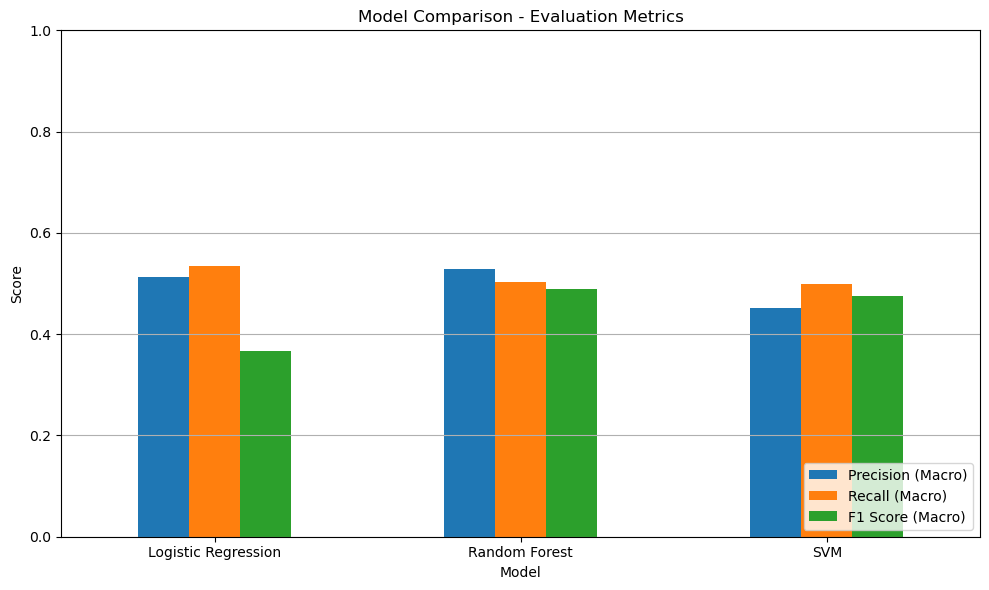

In [32]:
import matplotlib.pyplot as plt

# Plotting comparison of metrics
fig, ax = plt.subplots(figsize=(10, 6))

# Exclude OOB Score for visual clarity (different scale)
metrics_df.set_index('Model')[['Precision (Macro)', 'Recall (Macro)', 'F1 Score (Macro)']].plot.bar(ax=ax)
plt.title('Model Comparison - Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# 6. Interpretation and Conclusion 

After evaluating Logistic Regression, Random Forest, and Support Vector Machine (SVM) models on their performance in predicting smoking status, the **Random Forest classifier emerged as the most effective model**. It achieved the **highest F1 Score (0.4889)** among the three, indicating a strong balance between precision and recall — which is especially valuable in scenarios with potential class imbalance. Additionally, its **Precision (0.5286)** and **Recall (0.5038)** were also superior, reflecting both accuracy in positive predictions and the ability to capture most relevant cases. The **Out-of-Bag (OOB) score of 0.8937** further reinforces its robustness and generalization capability without relying solely on the test set.

While Logistic Regression offered higher interpretability and SVM delivered comparable recall, both fell short in F1 performance. Therefore, based on comprehensive evaluation metrics and overall reliability, **Random Forest is the recommended model for this classification task**, providing a well-rounded and dependable approach to predicting smoking status.
